#  **Predicting Medical Expenses Using Linear Regression**

**The following topics are covered in this tutorial:**

* A typical problem statement for machine learning
* Downloading and exploring a dataset for machine learning
* Linear regression with one variable using Scikit-learn
* Applying linear regression to other datasets

In [7]:
import pandas as pd
medical_df = pd.read_csv('../input/insurance/insurance.csv')
medical_df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.
Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.
Let's check the data type for each column.

In [8]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like "age", "children", "bmi" (body mass index) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!


Here are some statistics for the numerical columns:

In [9]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

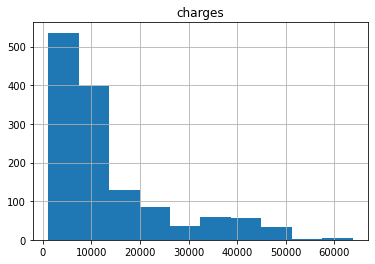

In [10]:
medical_df.hist(column="charges")

The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. We can see a right-skewed distribution of column "charges" as mean is higher that median.

# **Exploratory Analysis and Visualization**

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns. Also, we can see a high standard deviation that indicates data are more spread out.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

In [11]:
import plotly.express as px
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

The following settings will improve the default style and font sizes for our charts.

In [12]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# **Age**

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [13]:
#medical_df.age.value_counts().count() -> 47 unique values

In [14]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [15]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

# **Body Mass Index**

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [16]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a **Gaussian distribution** centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([source](https://jovian.ai/outlink?url=https%3A%2F%2Fstudy.com%2Facademy%2Flesson%2Fwhat-is-bmi-definition-formula-calculation.html)):

![](https://study.com/cimages/videopreview/videopreview-full/what-is-bmi_122979.jpg)

# **Charges**

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [17]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['grey', 'green'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under $10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is 7300, the median for smokers is close to 35,000.

# **Smoker**

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogr

In [18]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [19]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

It appears that 20% of customers have reported that they smoke.

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

# **Age and Charges**

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [20]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

    1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
    2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
    3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

# **BMI and Charges**

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [21]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

# **Correlation**

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [22]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [23]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [24]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.
    1. The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.
    2. A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    3. When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

* Direction: The sign of the correlation coefficient represents the direction of the relationship.
   1. Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
   2. Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.
Here's the same relationship expressed visually ([source](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/diksha-q-how-to-calculate-correlation-coefficient-01-1609233340.png)):

The correlation coefficient has the following formula:
![](https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson.gif)

Pandas dataframes also provide a .corr method to compute the correlation coefficients between all pairs of numeric columns.

In [25]:
medical_df.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

The result of .corr is called a correlation matrix and is often visualized using a heatmap.

In [26]:
sns.heatmap(medical_df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix');

**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features 
X
and 
Y
 can be correlated if 
X
 causes 
Y
 or if 
Y
 causes 
X
, or if both are caused independently by some other factor 
Z
, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that 
X
 are 
Y
 simply appear to be correlated because the sample is too small.
While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

# **Linear Regression using a Single Feature**

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.


In [27]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

Next, let's visualize the relationship between "age" and "charges"

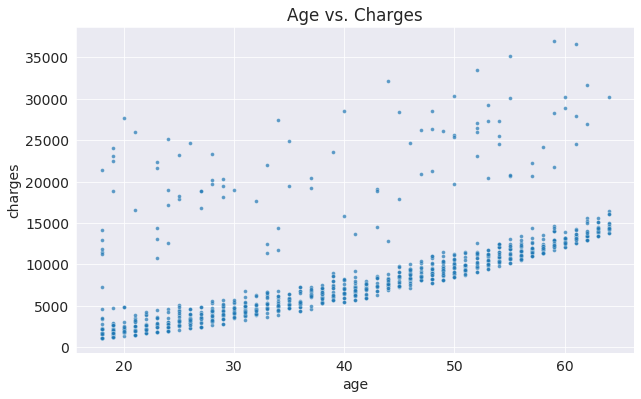

In [28]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

charges =*a* x *age + b*

The line is characterized two numbers: a (called "slope") and b (called "intercept").

Model
In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

We'll try determine w and b for the line that best fits the data.

* This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between "age" and "charges" as a straight line.
* The numbers w and b are called the parameters or weights of the model.
* The values in the "age" column of the dataset are called the inputs to the model and the values in the charges column are called "targets".
Let define a helper function estimate_charges, to compute charges, age, a and b


In [29]:
def estimate_charges(age, a, b):
    return a * age + b

The estimate_charges is our first model

Let's guess the values for a and b 

In [30]:
a = 50
b = 100

In [31]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, a, b)

We can plot the estimated charges using a line graph.

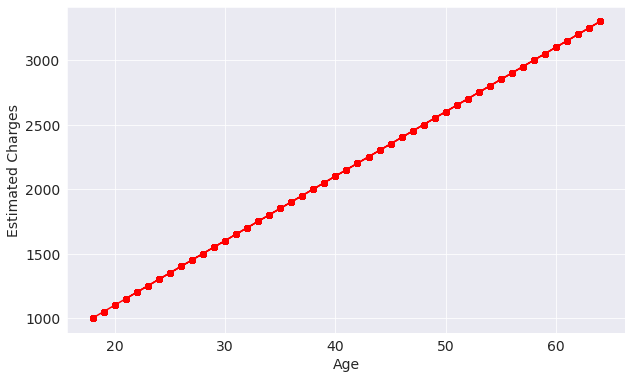

In [32]:
plt.xlabel('Age');
plt.ylabel('Estimated Charges');
plt.plot(ages, estimated_charges, 'r-o');



As expected, the points lie on a straight line.
We can overlay this line on the actual data, so see how well our model fits the data.

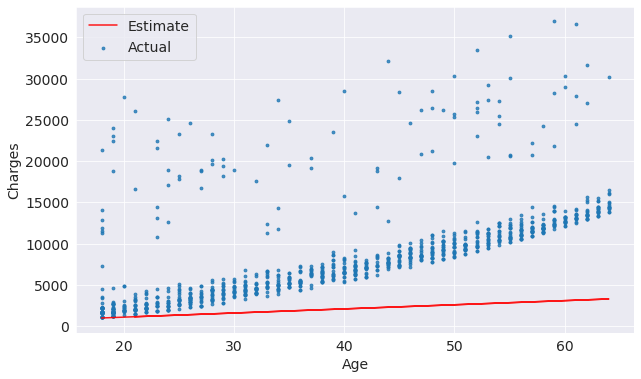

In [33]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of a and b to move the line around. Let's define a helper function try_parameters which takes a and b as inputs and creates the above plot.

In [34]:
def try_parameters(a, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, a, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

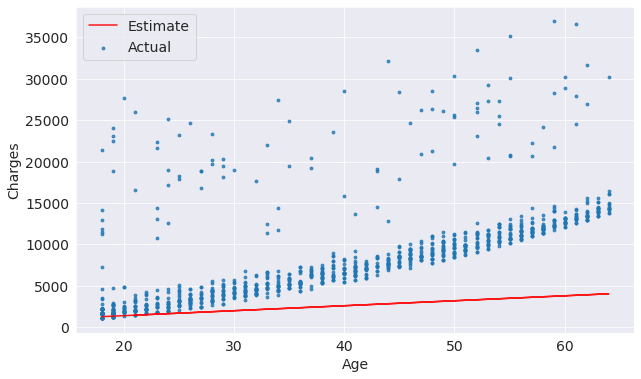

In [35]:
try_parameters(60, 200)

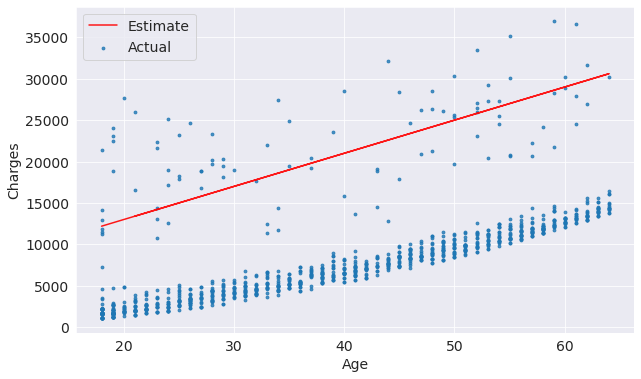

In [36]:
try_parameters(400, 5000)

As we change the values, of a and b manually, trying to move the line visually closer to the points, we are learning the approximate relationship between "age" and "charges".
Wouldn't it be nice if a computer could try several different values of a and b and learn the relationship between "age" and "charges"? To do this, we need to solve a couple of problems:

We need a way to measure numerically how well the line fits the points.

Once the "measure of fit" has been computed, we need a way to modify a and b to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine a and b for the best fit line, starting from a random guess.

# **Loss/Cost Function**

We can compare our model's predictions with the actual targets using the following method:

Calculate the difference between the targets and predictions (the differenced is called the "residual")

Square all elements of the difference matrix to remove negative values.

Calculate the average of the elements in the resulting matrix.

Take the square root of the result

The result is a single number, known as the root mean squared error (RMSE).

The above description can be stated mathematically as follows:

![](https://miro.medium.com/max/966/1*lqDsPkfXPGen32Uem1PTNg.png)

Geometrically, the residuals can be visualized as follows:
![](https://i.stack.imgur.com/zoYKG.png)

Let's define a function to compute the RMSE.

In [37]:
import numpy as np

In [38]:

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

Let's compute the RMSE for our model with a sample set of weights

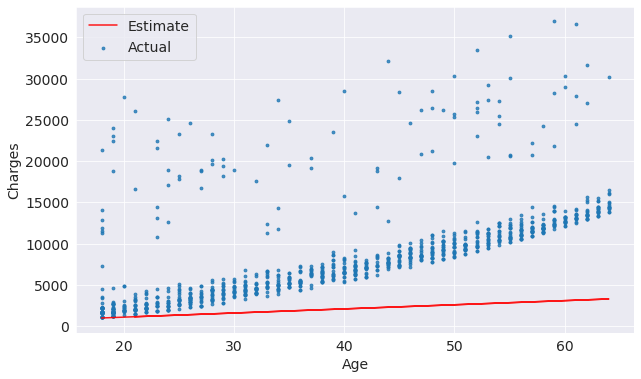

In [39]:
a = 50
b = 100
try_parameters(a, b)

In [40]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, a, b)

In [41]:
rmse(targets, predicted)

8461.949562575488

Here's how we can interpret the above number: On average, each element in the prediction differs from the actual target by *$8461.*

The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.
Let's modify the try_parameters functions to also display the loss.

In [42]:
def try_parameters(a, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, a, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575488


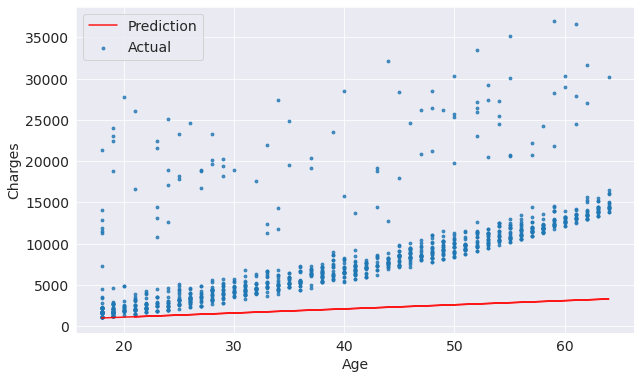

In [43]:
try_parameters(50, 100)

# **Optimizer**

Next, we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data.

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for a and b using matrix operations, while gradient descent uses a iterative approach, starting with a random values of a and b and slowly improving them using derivatives.

# **Linear Regression using Scikit-learn**

In practice, you'll never need to implement either of the above methods yourself. You can use a library like scikit-learn to do this for you.

Let's use the LinearRegression class from scikit-learn to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique.

In [44]:
from sklearn.linear_model import LinearRegression

First, we create a new model object.

In [45]:
model = LinearRegression()

Next, we can use the fit method of the model to find the best fit line for the inputs and targets.

In [46]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



Not that the input X must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

In [47]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


Let's fit the model to the data.

In [49]:
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61

In [50]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

Do these values seem reasonable? Compare them with the scatter plot above.
Let compute the predictions for the entire set of inputs

In [51]:
predictions = model.predict(inputs)

In [52]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

Let's compute the RMSE loss to evaluate the model.

In [53]:
rmse(targets, predictions)

4662.505766636391

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.
The parameters of the model are stored in the coef_ and intercept_ properties.

In [54]:
# a
model.coef_

array([267.24891283])

In [55]:
# b
model.intercept_

-2091.4205565650827

Are these parameters close to your best guesses?

Let's visualize the line created by the above parameters.

RMSE Loss:  4662.505766636391


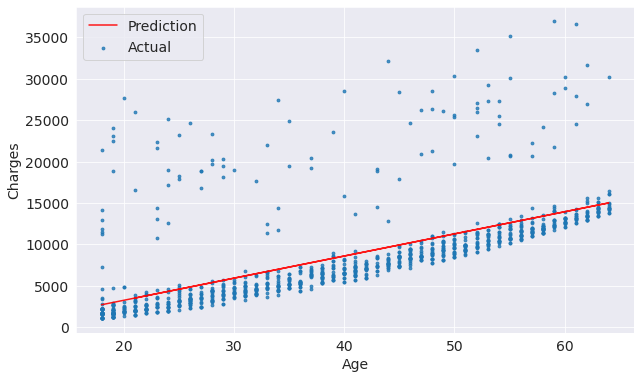

In [56]:
try_parameters(model.coef_, model.intercept_)

# **How to Approach a Machine Learning Problem**

**Here's a strategy you can apply to approach any machine learning problem:**

* Explore the data and find correlations between inputs and targets
* Pick the right model, loss functions and optimizer for the problem at hand
* Scale numeric variables and one-hot encode categorical data
* Set aside a test set (using a fraction of the training set)
* Train the model
* Make predictions on the test set and compute the loss
* We'll apply this process to several problems in future tutorials.